In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math

In [3]:
path = "/home/aisha/Documents/ignite_data.csv"
df = pd.read_csv(path, encoding = 'utf-8')

In [4]:
df.head()

state  account_length  area_code  phone_number  international_plan  \
0     16             128        415          2845                   0   
1     35             107        415          2301                   0   
2     31             137        415          1616                   0   
3     35              84        408          2510                   1   
4     36              75        415           155                   1   

   voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0                1                     25              265.1              110   
1                1                     26              161.6              123   
2                0                      0              243.4              114   
3                0                      0              299.4               71   
4                0                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  class  
0                              1      0  
1                              1      0  
2                              0      0  
3                              2      0  
4                              3      0  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null int64
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null int64
international_plan               5000 non-null int64
voice_mail_plan                  5000 non-null int64
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes               

In [6]:
df.shape

(5000, 21)

In [7]:
df.ndim

2

In [8]:
df.dtypes

state                              int64
account_length                     int64
area_code                          int64
phone_number                       int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
class                              int64
dtype: object

In [9]:
# For Min/Max/Mean/Std

df.describe() 

state  account_length    area_code  phone_number  \
count  5000.00000      5000.00000  5000.000000   5000.000000   
mean     25.99840       100.25860   436.911400   2499.500000   
std      14.80348        39.69456    42.209182   1443.520003   
min       0.00000         1.00000   408.000000      0.000000   
25%      13.00000        73.00000   408.000000   1249.750000   
50%      26.00000       100.00000   415.000000   2499.500000   
75%      39.00000       127.00000   415.000000   3749.250000   
max      50.00000       243.00000   510.000000   4999.000000   

       international_plan  voice_mail_plan  number_vmail_messages  \
count         5000.000000      5000.000000            5000.000000   
mean             0.094600         0.264600               7.755200   
std              0.292691         0.441164              13.546393   
min              0.000000         0.000000               0.000000   
25%              0.000000         0.000000               0.000000   
50%              0.000000         0.000000               0.000000   
75%              0.000000         1.000000              17.000000   
max              1.000000         1.000000              52.000000   

       total_day_minutes  total_day_calls  total_day_charge  ...  \
count        5000.000000      5000.000000       5000.000000  ...   
mean          180.288900       100.029400         30.649668  ...   
std            53.894699        19.831197          9.162069  ...   
min             0.000000         0.000000          0.000000  ...   
25%           143.700000        87.000000         24.430000  ...   
50%           180.100000       100.000000         30.620000  ...   
75%           216.200000       113.000000         36.750000  ...   
max           351.500000       165.000000         59.760000  ...   

       total_eve_calls  total_eve_charge  total_night_minutes  \
count      5000.000000       5000.000000          5000.000000   
mean        100.191000         17.054322           200.391620   
std          19.826496          4.296843            50.527789   
min           0.000000          0.000000             0.000000   
25%          87.000000         14.140000           166.900000   
50%         100.000000         17.090000           200.400000   
75%         114.000000         19.900000           234.700000   
max         170.000000         30.910000           395.000000   

       total_night_calls  total_night_charge  total_intl_minutes  \
count        5000.000000         5000.000000         5000.000000   
mean           99.919200            9.017732           10.261780   
std            19.958686            2.273763            2.761396   
min             0.000000            0.000000            0.000000   
25%            87.000000            7.510000            8.500000   
50%           100.000000            9.020000           10.300000   
75%           113.000000           10.560000           12.000000   
max           175.000000           17.770000           20.000000   

       total_intl_calls  total_intl_charge  number_customer_service_calls  \
count       5000.000000        5000.000000                    5000.000000   
mean           4.435200           2.771196                       1.570400   
std            2.456788           0.745514                       1.306363   
min            0.000000           0.000000                       0.000000   
25%            3.000000           2.300000                       1.000000   
50%            4.000000           2.780000                       1.000000   
75%            6.000000           3.240000                       2.000000   
max           20.000000           5.400000                       9.000000   

             class  
count  5000.000000  
mean      0.141400  
std       0.348469  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 21 columns]

/home/aisha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Churn')

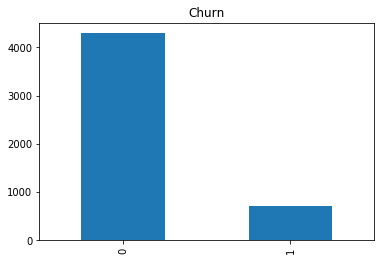

In [10]:
df['class'].value_counts().plot('bar').set_title('Churn')

In [11]:
# How many entries are there for each month?
areawise_df =  df['area_code'].value_counts()
areawise_df

415    2495
408    1259
510    1246
Name: area_code, dtype: int64

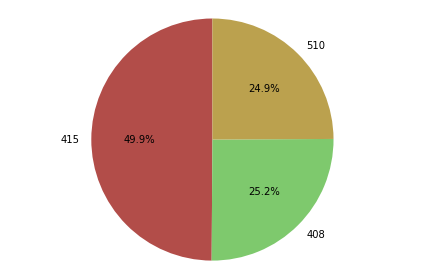

In [12]:
#Pie Chart for AREACODE:

labels = ['415' , '408' , '510'] 
counts = [2495 , 1259, 1246]
colors = ["#b24d49", "#7ec96d", "#bba14e"]

plt.pie(
    counts,
    labels=labels,
    shadow=False,
    colors=colors,
    startangle=90,
    autopct='%1.1f%%',
    )


plt.axis('equal')
plt.tight_layout()
plt.show()

In [13]:
df.groupby('international_plan')['phone_number'].count()

international_plan
0    4527
1     473
Name: phone_number, dtype: int64

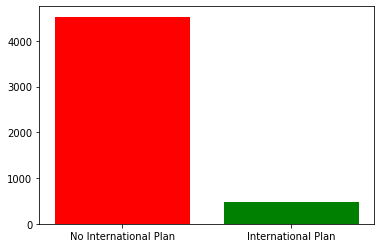

In [14]:
height = [4527, 473]
bars = ('No International Plan','International Plan')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['red', 'green'])
plt.xticks(y_pos, bars)
plt.show()

In [15]:
df.groupby('voice_mail_plan')['phone_number'].count()

voice_mail_plan
0    3677
1    1323
Name: phone_number, dtype: int64

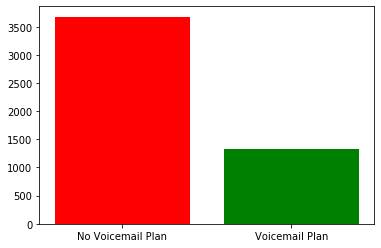

In [16]:
height = [3677, 1323]
bars = ('No Voicemail Plan','Voicemail Plan')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['red', 'green'])
plt.xticks(y_pos, bars)
plt.show()

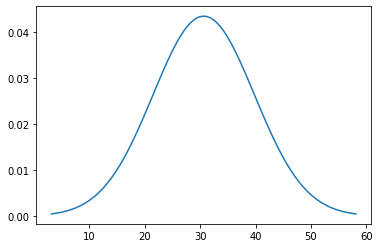

In [17]:
# Normal Distribution

mu = 30.65 # mean
sigma = 9.16 # standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

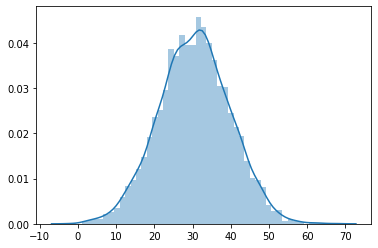

In [18]:
# Nnormal distribution curve

value = np.random.normal(loc=30.65,scale=9.2,size=5000)
sns.distplot(value)

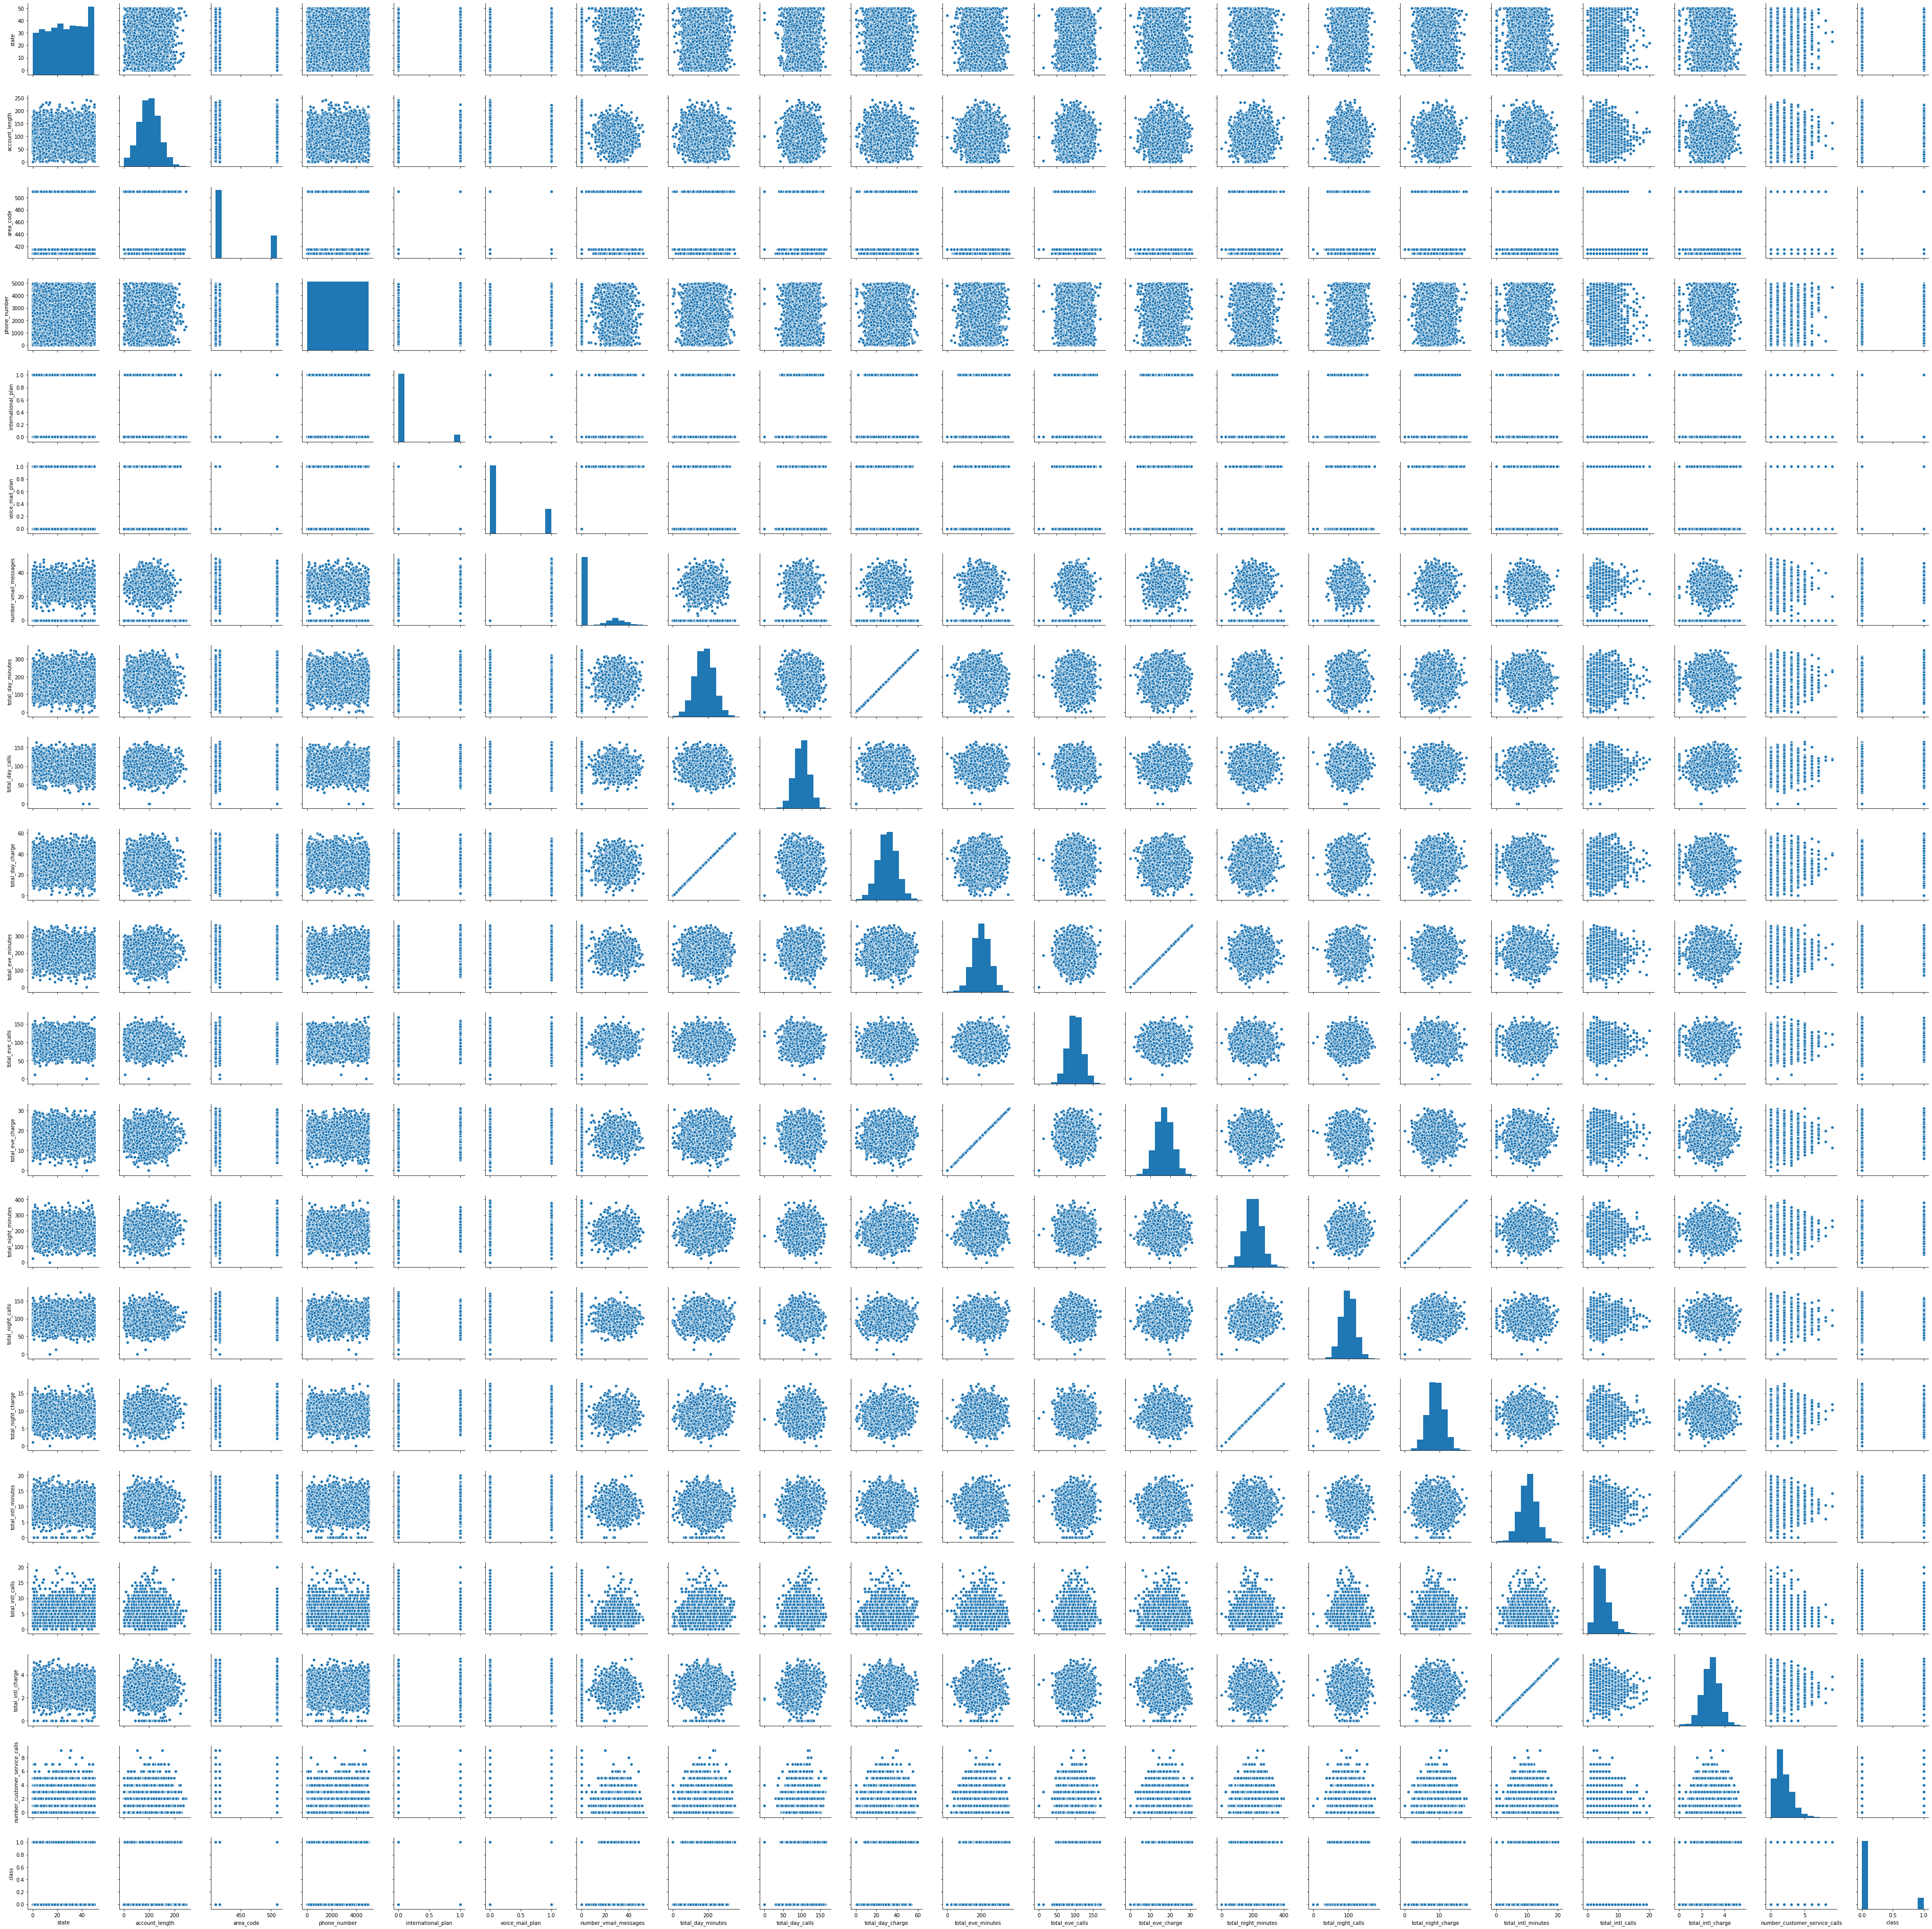

In [23]:
sns.pairplot(df)

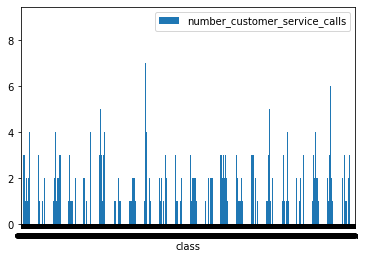

In [22]:
df.plot(x='class', y='number_customer_service_calls', kind='bar') 
plt.show()

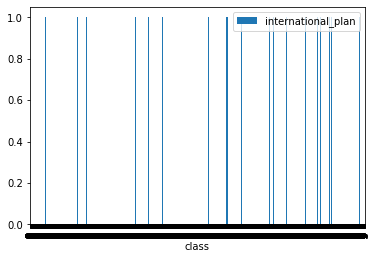

In [24]:
df.plot(x='class', y='international_plan', kind='bar') 
plt.show()

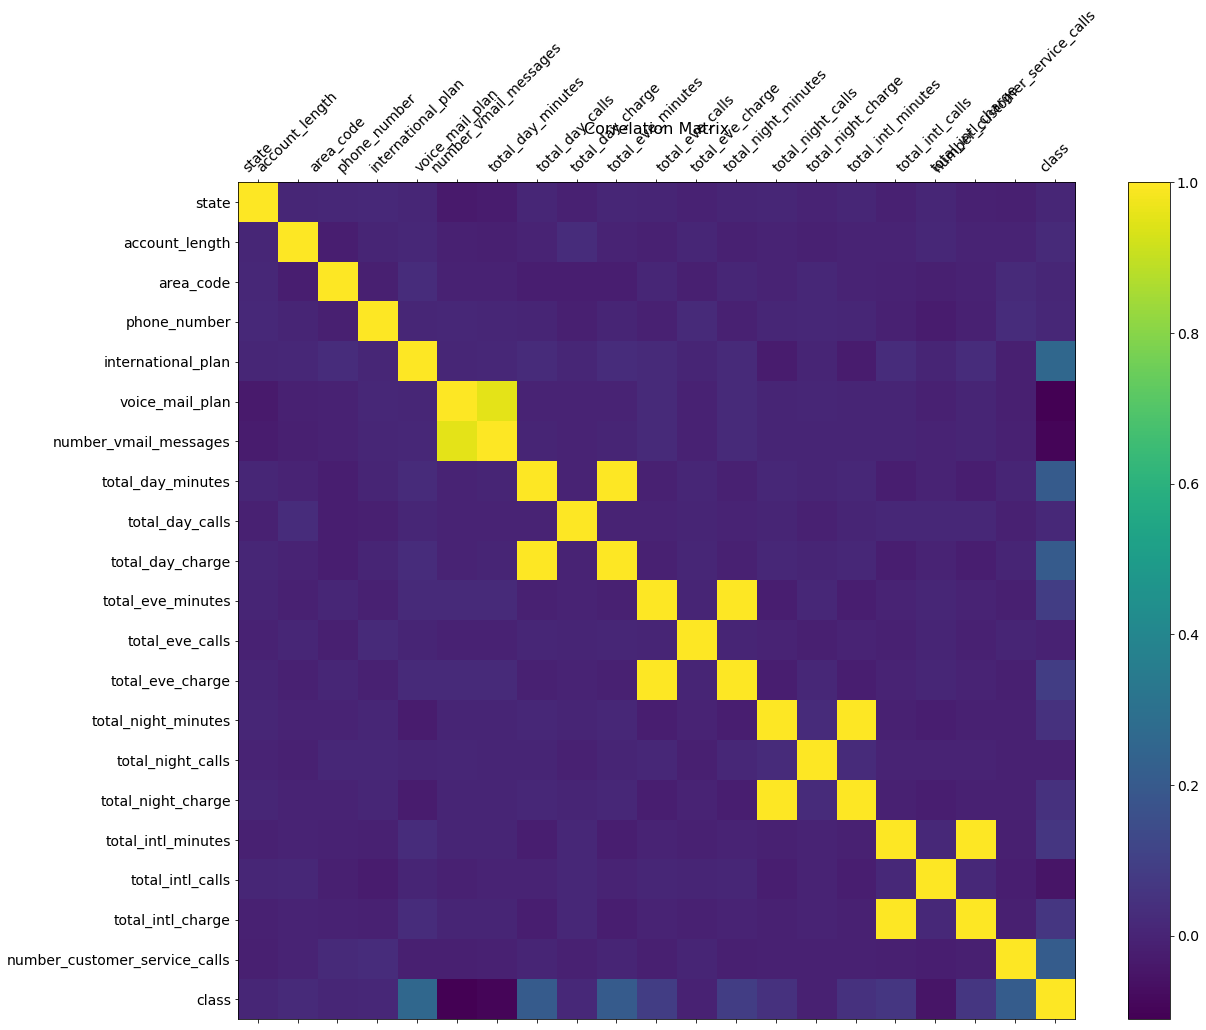

In [25]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [26]:
df['total_local_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_local_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_local_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']
df['average_charge_per_local_call'] = df['total_local_charge'] / df['total_local_calls']
df['average_local_call_duration_in_minutes'] = df['total_local_minutes'] / df['total_local_calls']
df['average_charge_per_intl_call'] = df['total_intl_charge'] / df['total_intl_calls']
df['average_intl_call_duration_in_minutes'] = df['total_intl_minutes'] / df['total_intl_calls']
df

state  account_length  area_code  phone_number  international_plan  \
0        16             128        415          2845                   0   
1        35             107        415          2301                   0   
2        31             137        415          1616                   0   
3        35              84        408          2510                   1   
4        36              75        415           155                   1   
...     ...             ...        ...           ...                 ...   
4995     11              50        408          2000                   0   
4996     49             152        415           394                   0   
4997      7              61        415           313                   0   
4998      7             109        510          3471                   0   
4999     46              86        415          2412                   0   

      voice_mail_plan  number_vmail_messages  total_day_minutes  \
0                   1                     25              265.1   
1                   1                     26              161.6   
2                   0                      0              243.4   
3                   0                      0              299.4   
4                   0                      0              166.7   
...               ...                    ...                ...   
4995                1                     40              235.7   
4996                0                      0              184.2   
4997                0                      0              140.6   
4998                0                      0              188.8   
4999                1                     34              129.4   

      total_day_calls  total_day_charge  ...  total_intl_charge  \
0                 110             45.07  ...               2.70   
1                 123             27.47  ...               3.70   
2                 114             41.38  ...               3.29   
3                  71             50.90  ...               1.78   
4                 113             28.34  ...               2.73   
...               ...               ...  ...                ...   
4995              127             40.07  ...               2.67   
4996               90             31.31  ...               3.97   
4997               89             23.90  ...               3.67   
4998               67             32.10  ...               2.30   
4999              102             22.00  ...               2.51   

      number_customer_service_calls  class  total_local_minutes  \
0                                 1      0                707.2   
1                                 1      0                611.5   
2                                 0      0                527.2   
3                                 2      0                558.2   
4                                 3      0                501.9   
...                             ...    ...                  ...   
4995                              2      0                756.2   
4996                              3      1                654.6   
4997                              1      0                525.8   
4998                              0      0                584.9   
4999                              0      0                551.3   

      total_local_calls  total_local_charge  average_charge_per_local_call  \
0                   300               72.86                       0.242867   
1                   329               55.54                       0.168815   
2                   328               59.00                       0.179878   
3                   248               65.02                       0.262177   
4                   356               49.36                       0.138652   
...                 ...                 ...                            ...   
4995                369               72.42                       0.196260   
4996                276               62.75           

In [27]:
#Dropping unneccessary columns:

df = df.drop(['total_day_minutes' , 'total_eve_minutes' , 'total_night_minutes', 'total_day_calls' , 'total_eve_calls', 'total_night_calls' ,'total_day_charge', 'total_eve_charge', 'total_night_charge'], axis=1)

In [28]:
# After DImensionality Reduction
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
state                                     5000 non-null int64
account_length                            5000 non-null int64
area_code                                 5000 non-null int64
phone_number                              5000 non-null int64
international_plan                        5000 non-null int64
voice_mail_plan                           5000 non-null int64
number_vmail_messages                     5000 non-null int64
total_intl_minutes                        5000 non-null float64
total_intl_calls                          5000 non-null int64
total_intl_charge                         5000 non-null float64
number_customer_service_calls             5000 non-null int64
class                                     5000 non-null int64
total_local_minutes                       5000 non-null float64
total_local_calls                         5000 non-null int64
total_local_charge 

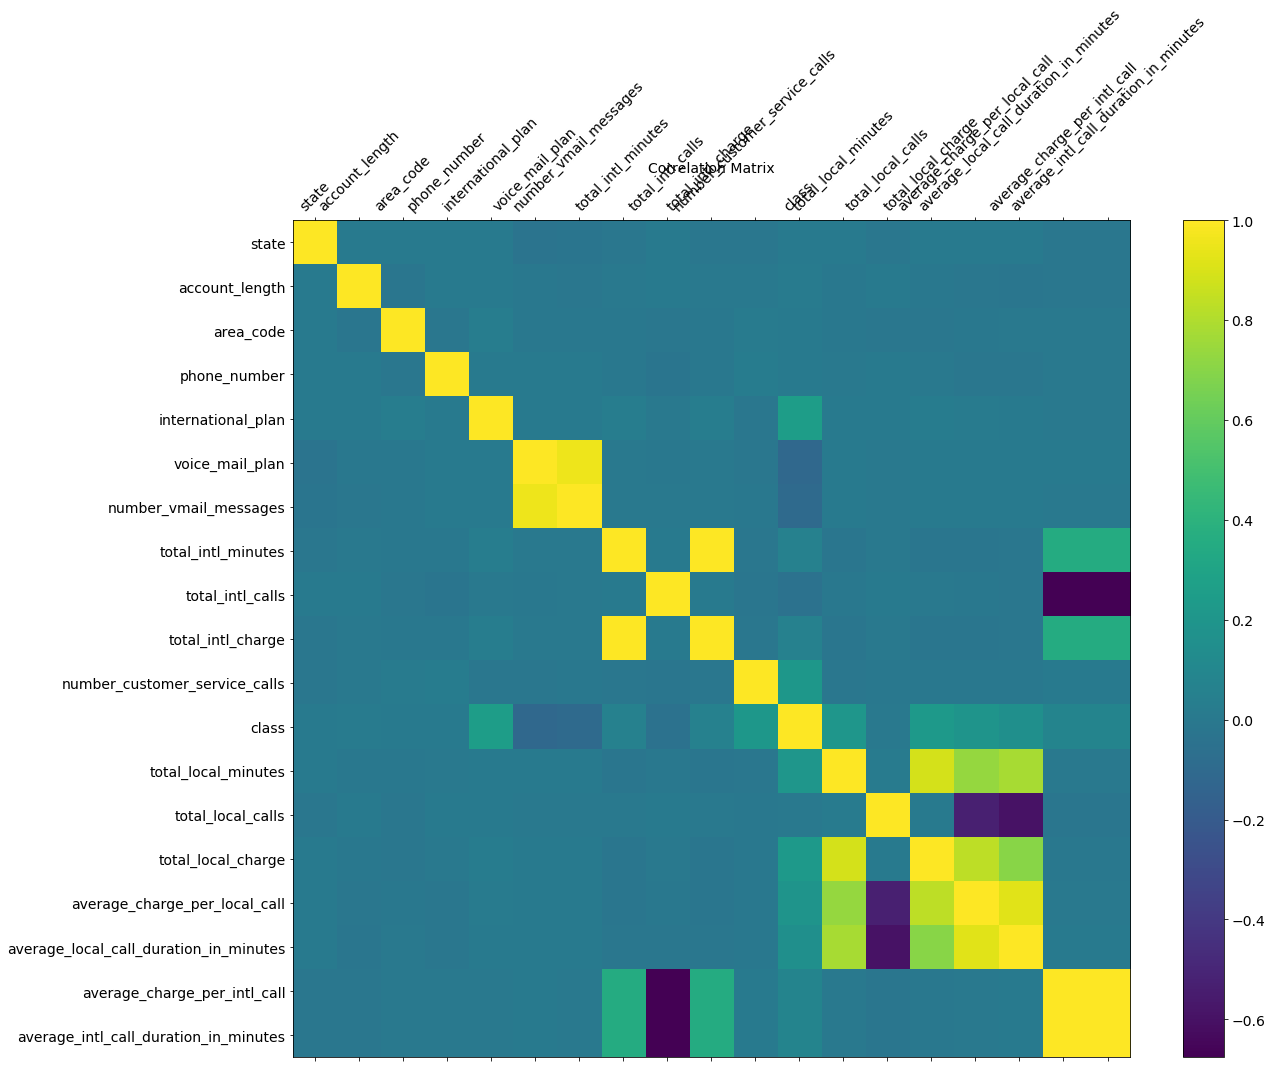

In [29]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14);